# Exploratory Data Analysis (EDA)

Exploratory Data Analysis is one of the crucial analytics process carried out to have a good understanding of the data and learn the different data characteristics,typically via the use of visual methods. Carrying out EDA allows you to be familiar with your data, understand patterns that exist in the data, and ultimately be able to produce a high-quality statistical analysis or build a high-performing model.

You must clean your data and make sure it is in an appropriate state before you begin data analysis or subject it to a machine learning algorithm. Additionally, it is crucial to be aware of any persistent trends and strong correlations that may be present in your data. The process of doing this is termed EDA. Python allows us to carry out seamless EDA because of its rich, easy-to-use and powerful libraries like Pandas, Seaborn, Numpy and Matplotlib.

### Importance of EDA
1. Helps you get your data in shape for analysis
2. Helps you to discover the trend in your data
3. Helps you to know the variables to concentrate on in your analysis
4. Detect the presence of outliers and missing values in the data
5. Allows you to carry out assumptions check and formulate hypothesis
6. Allows you to build high-perfromance ML models
7. Ultimately adds value to the quality of your analysis and by extension, the growth of the business.

### Skipping EDA is a bad idea!

You can be tempted to tend to either completely skip the exploratory step or undertake a very shallow work in your haste to reach the machine learning level or simply wow business stakeholders very quickly. It is a very dangerous error that unfortunately many novice data scientists make.

Skipping this important step can lead to skewed data, with outliers and too many missing values and, therefore, some sad outcomes for the project:

1. Generating inaccurate models;
2. Generating accurate models on the wrong data;
3. Choosing the wrong variables for the model;
4. Inefficient use of the resources, including the rebuilding of the model

## Carrying out EDA
Here, we'll follow a step-by-step appraoch of knowing the data. The activities packed in this section are outline below

1. __Getting to know the data__
2. __Importing data into Pandas Dataframe__
3. __Collecting basic information about the data__
    *  _Get the overall summary of the DataFrame_
    *  _Display the first/last/random N rows_
    *  _Get a summary descriptive statistics_
    *  _Check for missing values_
4. __Cleaning and completing the data__
    *  _Replacing missing values (if there's any)_
    *  _Excluding records from our data where we don't have any information about the data_
5. __Query the data to answer Analytical questions__
6. __Using Visuals to answer analytics question__
    *  _Univariate Analysis_
    * _Bivariate Analysis_
    * _Multivariate Analysis_

## EDA in action

### Meet the Data

We will be using a historical data on Avocado prices and sales volume in multiple US markets.

The data represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the data reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the data reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the data are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

1. _Date - The date of the observation_
2. _AveragePrice - the average price of a single avocado_
3. _Small Bags: Total number of Small bags_
4. _Large Bags: Total number of Large bags_
5. _XLarge Bags: Total number of XLarge bags_
6. _type - conventional or organic_
7. _year - the year_
8. _Region - the city or region of the observation_
9. _Total Volume - Total number of avocados sold_
10. _4046 - Total number of small avocados with PLU 4046 sold_
11. _4225 - Total number of medium avocados with PLU 4225 sold_
12. _4770 - Total number of large avocados with PLU 4770 sold_

### Import the data

In [29]:
# import the neccesary libraries first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

avocado_df = pd.read_csv("avocado.csv")

### Collecting basic information about the data

In [2]:
# Get the overall summary in the data
avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


We can see that we have different data types including float, int, and string (object) in the data. There are 18249 rows and 14 columns in the data and it occupies 1.9+ MB of space on our machine.

In [31]:
# display first/last few rows
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
# last five rows
avocado_df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [5]:
# Seven random rows of data
avocado_df.sample(7)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
15592,3,2017-12-10,1.41,20516.20,237.25,282.59,9.30,19987.06,19982.08,4.98,0.00,organic,2017,HarrisburgScranton
2523,27,2015-06-21,1.26,198137.18,84699.66,38461.41,51.04,74925.07,74925.07,0.00,0.00,conventional,2015,StLouis
1835,15,2015-09-13,1.13,1526985.30,727720.21,491074.45,15652.47,292538.17,271845.35,19120.68,1572.14,conventional,2015,Plains
9259,29,2015-06-07,1.71,13808.71,5560.86,3115.87,1042.17,4089.81,4076.52,13.29,0.00,organic,2015,BaltimoreWashington
13567,22,2016-07-24,1.81,8411.92,3787.14,211.45,0.00,4413.33,4380.00,33.33,0.00,organic,2016,Orlando
13331,46,2016-02-07,1.40,5805.78,579.26,2809.35,0.00,2417.17,1650.00,767.17,0.00,organic,2016,Nashville
6641,18,2017-08-27,1.29,179853.82,8671.85,83185.36,1093.00,86903.61,32946.35,52220.21,1737.05,conventional,2017,Indianapolis


#### Get a summary descriptive statistics

In [6]:
#Summary for numeric columns
avocado_df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


We can see different statistical summary of numeric columns. The mean, standard deviation, minimum and maximum values as well as the Percentile. __"For numeric data, the result’s index will include `count`, `mean`, `std`, `min`, `max` as well as `lower`, `50` and `upper percentiles`. By default the lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median."__

In [7]:
# summary for categorical columns
avocado_df.describe(include="object")

,Date,type,region
count,18249,18249,18249
unique,169,2,54
top,2015-12-27,conventional,Albany
freq,108,9126,338


We can see that the statistics returned for categorical columns are different. This included the count, number of unique categories, topmost unique category, and the frequency. __"For object data (e.g. strings or timestamps), the result’s index will include `count`, `unique`, `top`, and `freq`. The `top` is the most common value. The `freq` is the most common value’s frequency. Timestamps also include the first and last items."__

#### Check for Missing Values

In [33]:
avocado_df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

We can see that there are no missing values in any of the column

### Data Cleaning
Since our data contains no mmissing vlaues, we'll skip the step and move to excluding some of the columns we will not be using in our analysis.

In [9]:
# Dropping columns that are not relevant

columns_to_drop = ["Unnamed: 0", "Small Bags", "Large Bags", "XLarge Bags"]
avocado_df.drop(columns_to_drop, axis=1, inplace=True)

In [10]:
# let's see what is left in the DataFrame
avocado_df.head(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,conventional,2015,Albany
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,conventional,2015,Albany
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,conventional,2015,Albany
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,conventional,2015,Albany
8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,conventional,2015,Albany
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,conventional,2015,Albany


In [11]:
# Let's rename 4046, 4225, and 4770
col_to_rename = {"4046":"Small",
                "4225": "Medium",
                "4770": "Large"}
avocado_df.rename(columns=col_to_rename, inplace=True)

In [12]:
# let's see the changes in our dataset
avocado_df.head(10)

,Date,AveragePrice,Total Volume,Small,Medium,Large,Total Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,conventional,2015,Albany
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,conventional,2015,Albany
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,conventional,2015,Albany
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,conventional,2015,Albany
8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,conventional,2015,Albany
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,conventional,2015,Albany


In [48]:
# Let's change the Date column to a DateTime type instead of Object type
avocado_df["Date"] = pd.to_datetime(avocado_df["Date"])

In [14]:
#let's check the type again
avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   Small         18249 non-null  float64       
 4   Medium        18249 non-null  float64       
 5   Large         18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   type          18249 non-null  object        
 8   year          18249 non-null  int64         
 9   region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 1.4+ MB


### Query the Data to answer Analytic Question
Now that we have a clean data, we can proceed to making analysis

In [15]:
# How many unique region and avocado type do we have in our data?
avocado_df["type"].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [37]:
avocado_df["region"].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

There are quite many of them

##### How many conventional type of Avocado has the average price greater than 1 dollar?

In [17]:
# first slice the dataframe to include only the conventional type

conventional_type = avocado_df[(avocado_df["type"] == "conventional") & (avocado_df["AveragePrice"] > 1.0)]
conventional_type

,Date,AveragePrice,Total Volume,Small,Medium,Large,Total Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,conventional,2015,Albany
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...
9101,2018-01-07,1.13,36703156.72,13730992.75,10781339.21,677714.86,11513109.90,conventional,2018,TotalUS
9110,2018-01-28,1.01,7007265.31,2718390.81,1664995.75,93165.88,2530712.87,conventional,2018,West
9111,2018-01-21,1.04,7053820.12,2218365.17,1811849.78,106001.28,2917603.89,conventional,2018,West
9112,2018-01-14,1.05,7577456.14,2249412.86,2028819.77,113257.03,3185966.48,conventional,2018,West


In [39]:
conventional_type.shape[0]

6441

In [18]:
print(f"There are {conventional_type.shape[0]} conventional type of Avocado with Average price more than 1 dollar")

There are 6441 conventional type of Avocado with Average price more than 1 dollar


##### What is the total number of Avocado types observed over the year?

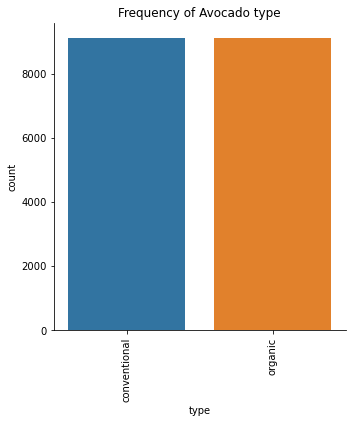

In [19]:
ax = sns.catplot(x = "type",
                data = avocado_df,
                kind = "count",
                )
# ax.set_xlabels("Region")
# ax.set_ylabels("Price")
ax.set_xticklabels(rotation=90)
plt.title("Frequency of Avocado type")
plt.show()

##### Average Price distribution

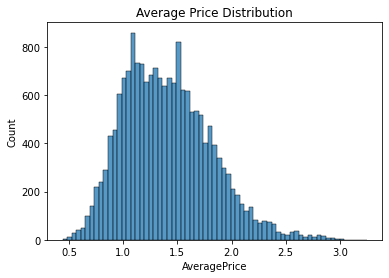

In [20]:
ax = sns.histplot(x = "AveragePrice",
                data = avocado_df,
                )
# ax.set_xlabels("Region")
# ax.set_ylabels("Price")
plt.title("Average Price Distribution")
plt.show()

##### Total Volume distribution

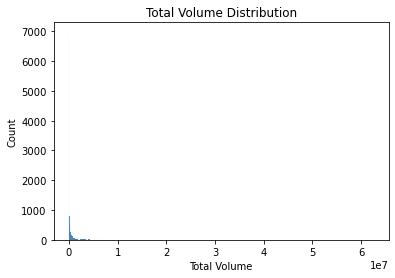

In [21]:
ax = sns.histplot(x = "Total Volume",
                data = avocado_df,
                )
# ax.set_xlabels("Region")
# ax.set_ylabels("Price")
plt.title("Total Volume Distribution")
plt.show()

The volume is heavely skewed to the right (positive skewness). Performing inferential analysis or fitting a machine learning model on this kind of data could negatively imoact the results. Some sort of Transformation will be needed to get the data in shape after the EDA step.

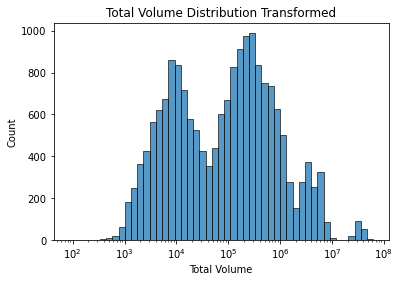

In [22]:
# total volume log transformed
ax = sns.histplot(x = "Total Volume",
                data = avocado_df,
                log_scale=True
                )
# ax.set_xlabels("Region")
# ax.set_ylabels("Price")
plt.title("Total Volume Distribution Transformed")
plt.show()

##### Which region have the lowest and highest prices of Avocado?

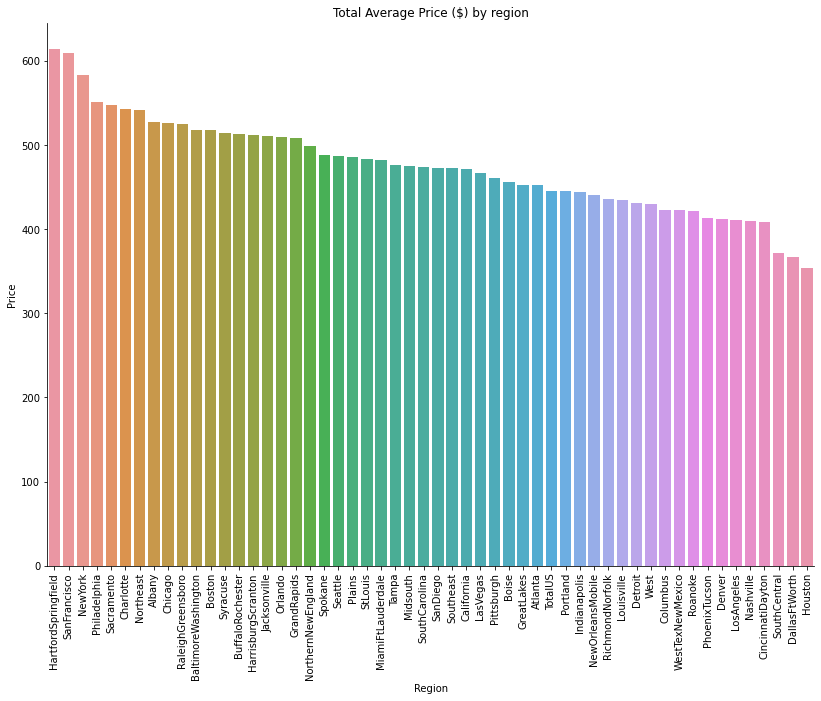

In [42]:
# group by region and get the total average price per region
price_by_region = avocado_df.groupby('region')["AveragePrice"].sum()

# reset the index to make a df
price_by_region = price_by_region.reset_index()

#sort to get the highest and the lowest
price_by_region_sorted = price_by_region.sort_values(by="AveragePrice", ascending=False)
#print(price_by_region_sorted)


#make a bar plot
#plt.subplots(figsize=(15,5))
ax = sns.catplot(x = "region",
                y = "AveragePrice",
                data = price_by_region_sorted,
                kind = "bar",
                height=8.27, aspect=11.7/8.27)
ax.set_xlabels("Region")
ax.set_ylabels("Price")
ax.set_xticklabels(rotation=90)
plt.title("Total Average Price ($) by region")
plt.show()

We can see that HartfordSpringfield	has the highest Total Average Price while Houston has the lowest. We can further confirm the lowest price region to be sure that we are interpreting the chart correctly

In [45]:
price_by_region_sorted.tail(1)

,region,AveragePrice
18,Houston,354.2


In [91]:
lowest_price_region = price_by_region_sorted['region'].iloc[-1]
print(f"The region with the lowest price is {lowest_price_region}")

The region with the lowest price is Houston


##### What is the average avocado prices in each year?

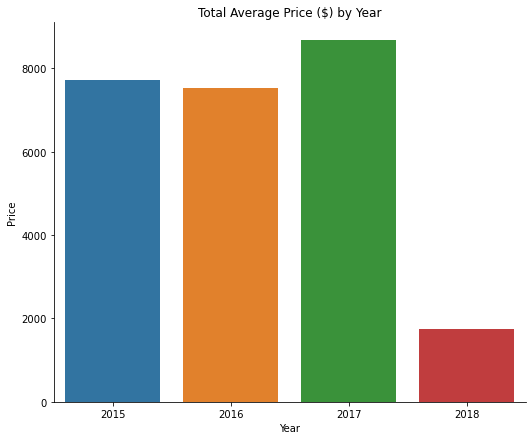

In [92]:
# group by region and get the total average price per region
price_by_year = avocado_df.groupby('year')["AveragePrice"].sum()

# reset the index to make a df
price_by_year = price_by_year.reset_index()

#sort to get the highest and the lowest
price_by_year_sorted = price_by_year.sort_values(by="AveragePrice", ascending=False)
#print(price_by_region_sorted)


#make a bar plot
#plt.subplots(figsize=(15,5))
ax = sns.catplot(x = "year",
                y = "AveragePrice",
                data = price_by_year_sorted,
                kind = "bar",
                height=6, aspect=1.25)
ax.set_xlabels("Year")
ax.set_ylabels("Price")
#ax.set_xticklabels(rotation=90)
plt.title("Total Average Price ($) by Year")
plt.show()

##### What is the average avocado volume in each year?

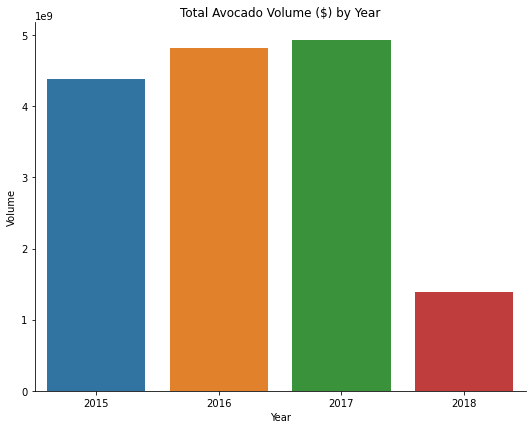

In [93]:
# group by region and get the total average price per region
volume_by_year = (avocado_df.groupby('year')["Total Volume"]
                  .sum()
                  .reset_index()
                  .sort_values(by="Total Volume", ascending=False))


#make a bar plot
#plt.subplots(figsize=(15,5))
ax = sns.catplot(x = "year",
                y = "Total Volume",
                data = volume_by_year,
                kind = "bar",
                height=6, aspect=1.25)
ax.set_xlabels("Year")
ax.set_ylabels("Volume")
#ax.set_xticklabels(rotation=90)
plt.title("Total Avocado Volume ($) by Year")
plt.show()

##### What is the pattern of Avocado price over the years?

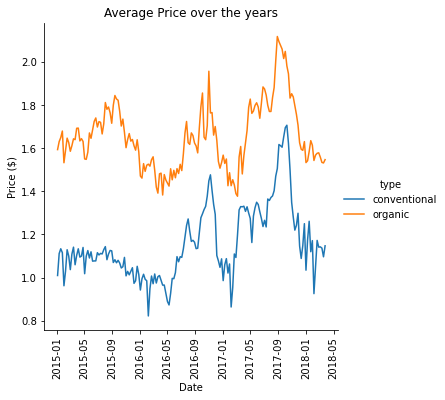

In [109]:
ax = sns.relplot(x="Date",
           y = "AveragePrice",
           data = avocado_df,
           kind = 'line',
           hue = 'type',
           ci = None)
ax.set_xlabels("Date")
ax.set_ylabels("Price ($)")
ax.set_xticklabels(rotation=90)
plt.title("Average Price over the years")
plt.show()

1. We can see the price was relatively stable in 2015 more than other years. 
2. A fall in price was recorded between Q4 2015 and Q1 2016.
3. There was a price hike in Q4 2016 and a sharp fall in Q1 2017
4. Another sharp fall in 2018.

Summarily, Avocados hit a high in late summer 2017 with increasing prices during summer/early fall and decreasing prices during the winter months. Also to note, there was a sizable drop in organic prices for July 2015. 

##### What is the average price movement for each Avocado type in the first three Quarters of 2017?

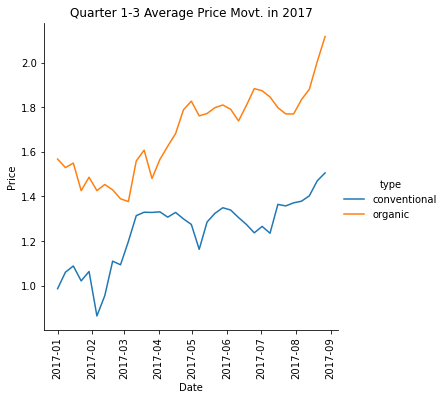

In [105]:
# slice the dataframe to include obly 2017
price_2017 = avocado_df[(avocado_df.Date >= "2017, 01, 01") & (avocado_df.Date <= "2017, 09, 01")]

# make a line plot
ax = sns.relplot(x="Date",
           y = "AveragePrice",
           data = price_2017,
           kind = 'line',
           hue = 'type',
           ci = None)
ax.set_xlabels("Date")
ax.set_ylabels("Price")
ax.set_xticklabels(rotation=90)
plt.title("Quarter 1-3 Average Price Movt. in 2017")
plt.show()

##### What is the monthly average price of Avocado?

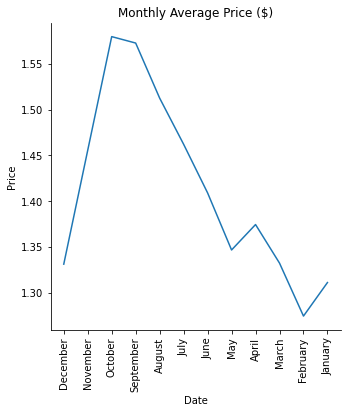

In [49]:
#let's extract the month and the day from the Date

avocado_df["Month"] = avocado_df.Date.dt.month_name()
#avocado_df["Month"] = avocado_df.avocado_df["Month"].dt.month_name()

ax = sns.relplot(x="Month",
           y = "AveragePrice",
           data = avocado_df,
           kind = 'line',
           ci = None)
ax.set_xlabels("Date")
ax.set_ylabels("Price")
ax.set_xticklabels(rotation=90)
plt.title("Monthly Average Price ($)")
plt.show()

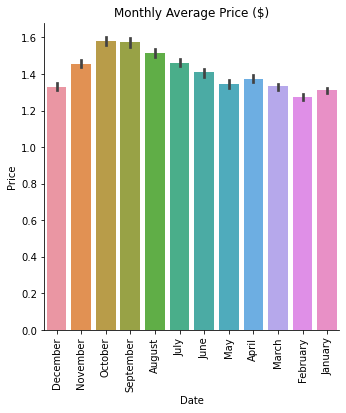

In [51]:
ax = sns.catplot(x="Month",
           y = "AveragePrice",
           data = avocado_df,
           kind = 'bar')
ax.set_xlabels("Date")
ax.set_ylabels("Price")
ax.set_xticklabels(rotation=90)
plt.title("Monthly Average Price ($)")
plt.show()

##### What is the relationship between average price and Total volume for each type

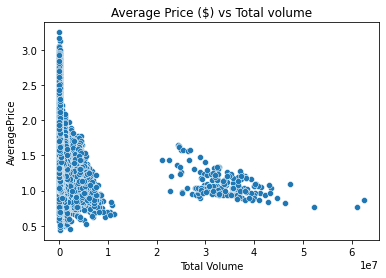

In [28]:
# use scatter plot here price vs volume

ax = sns.scatterplot(x="Total Volume",
           y = "AveragePrice",
           data = avocado_df,
                )
plt.title("Average Price ($) vs Total volume")
plt.show()

##### Avocado Sales volume by month

In [ ]:
#bar chart; month vs total volume

## Mini Project: Exploratory Data Analysis

The information on the Internet is truly unending. E-commerce and review websites are teeming with untapped data that has the potential to be transformed into insightful knowledge that can support sound decision-making. In this project, you are going to use your knowledge of EDA to dig dip into the Google Playstore dataset. The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. You can grab the dataset here https://www.kaggle.com/datasets/lava18/google-play-store-apps 

NOTE: You have to register on this site before you can have access to the data. After grabbing the data, use it to answer the questions below.

1. Collect the basic information about your data (ensure you check for missing values and treat them appropriately. You should also clean up the data.
2. What category has the most app?
3. What are the number of apps with 4+ star rating
4. What are the top 4 choice apps for teenagers? Display the ratings of the Apps with the appropriate chart
5. What are the top 5 apps prefered by teengers in the Adventure category?
6. What is the most expensive app in the playstore?
7. What is the average rating per category? Dispay the top ten apps with respect to their average ratings
8. Using Pivot table, find the average rating and highest price per category
9. What is the percentage market share of each app by category? Visualize the output using the appropriate chart
10. How is the installation distributed? 

In [54]:
state_dict = {"Kwara":"Ilorin",
             "Lagos":"Ikeja",
             "Osun":"Osogbo",
             "Kogi":"Lokoja"}
state_dict

{'Kwara': 'Ilorin', 'Lagos': 'Ikeja', 'Osun': 'Osogbo', 'Kogi': 'Lokoja'}

In [55]:
state_dict.keys()

dict_keys(['Kwara', 'Lagos', 'Osun', 'Kogi'])

In [56]:
state_dict.values()

dict_values(['Ilorin', 'Ikeja', 'Osogbo', 'Lokoja'])

In [57]:
student_dict = {"Sheriff": 78,
               "Ademola": 24}
student_dict

{'Sheriff': 78, 'Ademola': 24}

In [58]:
student_dict_extended = {"Js one": [13, 17, 18,15],
                        "Js Two": [17, 13, 16, 18]}

In [59]:
student_dict_extended 

{'Js one': [13, 17, 18, 15], 'Js Two': [17, 13, 16, 18]}